In [213]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [191]:
#reading dataset into a dataframe
df = pd.read_csv("us_retail_sales.csv")
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0
5,1997,202371,204286,204990,203399,201699,204675,207014.0,207635.0,208326.0,208078.0,208936.0,209363.0
6,1998,209666,209552,210832,213633,214639,216337,214841.0,213636.0,215720.0,219483.0,221134.0,223179.0
7,1999,223997,226250,227417,229037,231235,231903,233948.0,236566.0,237481.0,237553.0,240544.0,245485.0
8,2000,243436,247133,249825,245831,246201,248160,247176.0,247576.0,251837.0,251221.0,250331.0,250658.0
9,2001,252654,252704,250328,254763,255218,254022,252997.0,254560.0,249845.0,267999.0,260514.0,256549.0


In [192]:
#unpivoting table 
#automatically removed nan values
df2 = df.set_index(['YEAR']).rename_axis(columns='month').stack().reset_index(name='value')
df2

,YEAR,month,value
0,1992,JAN,146925.0
1,1992,FEB,147223.0
2,1992,MAR,146805.0
3,1992,APR,148032.0
4,1992,MAY,149010.0
...,...,...,...
349,2021,FEB,504458.0
350,2021,MAR,559871.0
351,2021,APR,562269.0
352,2021,MAY,548987.0


Plot the data with proper labeling and make some observations on the graph.


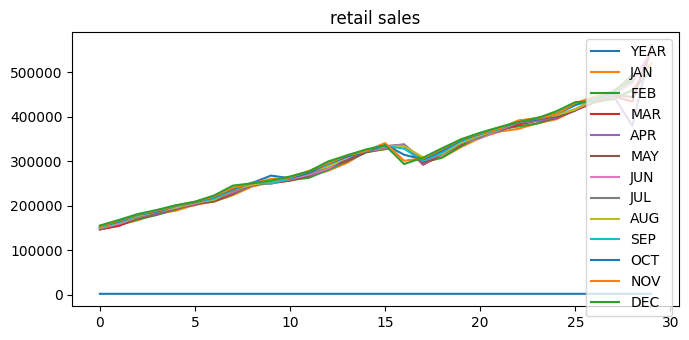

In [193]:
df.plot()
plt.title("retail sales")
plt.show()

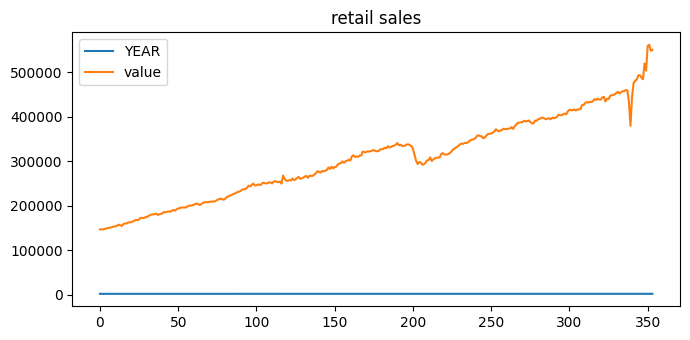

In [194]:
df2.plot()
plt.title("retail sales")
plt.show()

What we're being shown above is, as time goes by, the retail prices have, mostly, been on an increase. I was also interested in seeing if there was much of a difference between the plots before and after the pivot change. However, the data looks almost exactly the same. It's just easier to see the little ups and downs in the second graph, after the data has been pivoted. 

Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [195]:
#creating my train set with data before july 2020
df_train = df2.iloc[:342]
df_train

,YEAR,month,value
0,1992,JAN,146925.0
1,1992,FEB,147223.0
2,1992,MAR,146805.0
3,1992,APR,148032.0
4,1992,MAY,149010.0
...,...,...,...
337,2020,FEB,459610.0
338,2020,MAR,434281.0
339,2020,APR,379892.0
340,2020,MAY,444631.0


In [196]:
#creating test set with data including and after july 2020
df_test = df2.iloc[342:]
df_test

,YEAR,month,value
342,2020,JUL,481627.0
343,2020,AUG,483716.0
344,2020,SEP,493327.0
345,2020,OCT,493991.0
346,2020,NOV,488652.0
347,2020,DEC,484782.0
348,2021,JAN,520162.0
349,2021,FEB,504458.0
350,2021,MAR,559871.0
351,2021,APR,562269.0


Use the training set to build a predictive model for the monthly retail sales.

In [197]:
#creating training set
x_train = np.arange(len(df_train)).reshape(-1, 1)
y_train = df_train['value'].values

In [198]:
#linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [199]:
#creating test set
x_test = np.arange(len(df_train), len(df2)).reshape(-1, 1)
y_test = df_test['value'].values

In [202]:
# create and fit the LSTM network for second model
model2 = Sequential()
model2.add(LSTM(4, input_shape=(1, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
342/342 - 1s - loss: 97427816448.0000 - 1s/epoch - 4ms/step
Epoch 2/100
342/342 - 0s - loss: 97427267584.0000 - 287ms/epoch - 839us/step
Epoch 3/100
342/342 - 0s - loss: 97426808832.0000 - 284ms/epoch - 830us/step
Epoch 4/100
342/342 - 0s - loss: 97426317312.0000 - 285ms/epoch - 833us/step
Epoch 5/100
342/342 - 0s - loss: 97425776640.0000 - 281ms/epoch - 820us/step
Epoch 6/100
342/342 - 0s - loss: 97425326080.0000 - 284ms/epoch - 829us/step
Epoch 7/100
342/342 - 0s - loss: 97424793600.0000 - 296ms/epoch - 866us/step
Epoch 8/100
342/342 - 0s - loss: 97424302080.0000 - 287ms/epoch - 840us/step
Epoch 9/100
342/342 - 0s - loss: 97423794176.0000 - 278ms/epoch - 812us/step
Epoch 10/100
342/342 - 0s - loss: 97422770176.0000 - 376ms/epoch - 1ms/step
Epoch 11/100
342/342 - 0s - loss: 97421869056.0000 - 337ms/epoch - 986us/step
Epoch 12/100
342/342 - 0s - loss: 97421230080.0000 - 276ms/epoch - 807us/step
Epoch 13/100
342/342 - 0s - loss: 97420484608.0000 - 270ms/epoch - 790us/step
Ep

Use the model to predict the monthly retail sales on the last year of data.

In [184]:
#predictions for linear regression model
y_pred = model.predict(x_test)
y_pred

array([449457.76253194, 450330.80997684, 451203.85742175, 452076.90486665,
       452949.95231155, 453822.99975646, 454696.04720136, 455569.09464627,
       456442.14209117, 457315.18953607, 458188.23698098, 459061.28442588])

In [215]:
# make predictions
train_pred = model2.predict(x_train)
test_pred = model2.predict(x_test)

1/1 [==============================] - 0s 21ms/step


Report the RMSE of the model predictions on the test set.

In [185]:
#RMSE for linear regression model, the lower the value the better
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE of the model predictions on the test set: 66432.62829228971


In [214]:
#report out r2-value just to see what it is
#r2-value is negative for the linear regression. This indicates a poorly fitted model. 
r2 = r2_score(y_test, y_pred)
print('R2:',r2)

R2: -3.6344474854939275


In [218]:
#root mean squared error
#ever higher than the linear regression. either this is a worse model or I did it incorrectly. 
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train Score: %.2f RMSE' % (train_rmse))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print('Test Score: %.2f RMSE' % (test_rmse))

Train Score: 312011.66 RMSE
Test Score: 515181.87 RMSE


In [219]:
#r2 scores
#both of these r2 scores are also negative. didn't do LMSR correctly? 
r2_test = r2_score(y_test, test_pred)
print('R2:',r2_test)
r2_train = r2_score(y_train, train_pred)
print('R2:',r2_train)

R2: -277.7123606511394
R2: -11.826016759471196
